In [1]:
%load_ext autoreload
%autoreload 2
# %config InlineBackend.figure_format = 'svg'
import os
os.environ["KERAS_BACKEND"] = "jax"
os.environ["JAX_PLATFORMS"] = "cpu"
import sys
sys.path.append('../')
from pathlib import Path
import numpy as np
import random as rd
import utils as u
import visualizer as v
import simulation_models.modelloader as ml
import matplotlib.pyplot as plt
from collections import defaultdict
# set random seed
rd.seed(0)
np.random.seed(0)

INFO:bayesflow:Using backend 'jax'


In [2]:
results_path = Path("../results/micp_posterior/prior_param_4_extended_poly_degree_3/infnet_splinecouplingflow_sumnet_none")

In [3]:
# find all folders with results in results_path
folders = [f.resolve() for f in results_path.iterdir() if f.is_dir() and f.name[0].isdigit()]
print(folders)
nested_dict = lambda: defaultdict(nested_dict)
parameter_draws_dict = nested_dict()
out_params_dict = nested_dict()
out_datasets_dict = nested_dict()
path_dict = nested_dict()
# load parameter draws in respective folders
for folder in folders:
    config_file = list(folder.glob("*.json"))[0]
    config = u.read_config(config_file)
    config.micp.data_path = "../data/MICP/full_complexity_model"
    modelloader = ml.ModelLoader(config)
    model = modelloader.get_model()
    draws = u.load_draws(folder)
    draws = model.rename_parameter_keys(draws)
    out_datasets, out_params, _ = u.load_out(folder)
    out_datasets = model.rename_parameter_keys(out_datasets)
    out_params = model.rename_parameter_keys(out_params)
    print(out_datasets.keys())
    parameter_draws_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_apc.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = draws
    out_params_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_apc.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = out_params
    out_datasets_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_apc.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = out_datasets
    
    path_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_apc.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = folder
print(out_datasets_dict.keys())
out_params_dict_ = out_params_dict['bayesian_point_apc']['abi']['sigma_a=False']['low_budget=False']
print(out_params_dict_.keys())

[PosixPath('/data/homes/reiser/projects/sabi/results/micp_posterior/prior_param_4_extended_poly_degree_3/infnet_splinecouplingflow_sumnet_none/2025-08-26_09-06-01'), PosixPath('/data/homes/reiser/projects/sabi/results/micp_posterior/prior_param_4_extended_poly_degree_3/infnet_splinecouplingflow_sumnet_none/2025-08-26_10-48-20'), PosixPath('/data/homes/reiser/projects/sabi/results/micp_posterior/prior_param_4_extended_poly_degree_3/infnet_splinecouplingflow_sumnet_none/2025-08-27_11-19-14'), PosixPath('/data/homes/reiser/projects/sabi/results/micp_posterior/prior_param_4_extended_poly_degree_3/infnet_splinecouplingflow_sumnet_none/2025-08-27_11-43-03'), PosixPath('/data/homes/reiser/projects/sabi/results/micp_posterior/prior_param_4_extended_poly_degree_3/infnet_splinecouplingflow_sumnet_none/2025-08-20_15-27-37')]
dict_keys(['$c_{a,1}$', '$c_{a,2}$', '$\\rho_f$', '$k_{ub}$', 'observations'])
dict_keys(['$c_{a,1}$', '$c_{a,2}$', '$\\rho_f$', '$k_{ub}$', 'observations'])
dict_keys(['$c_{

In [4]:
print(out_datasets.keys())
print(out_params.keys())
print(draws.keys())

dict_keys(['$c_{a,1}$', '$c_{a,2}$', '$\\rho_f$', '$k_{ub}$', 'observations'])
dict_keys(['$c_{a,1}$', '$c_{a,2}$', '$\\rho_f$', '$k_{ub}$'])
dict_keys(['$c_{a,1}$', '$c_{a,2}$', '$\\rho_f$', '$k_{ub}$'])


In [5]:
config.output_path = results_path
vis = v.Visualizer(config)
# vis.compare_posterior_parameter_recovery(out_params_dict_plot, data_to_plot, height=6, labels=labels)
# vis.compare_posterior_parameter_mcmc_abi(out_params_dict_plot, data_to_plot, height=6, labels=labels)
# vis.compare_posterior_parameter_calibration(out_params_dict_plot, data_to_plot, height=6, labels=labels)

In [10]:
def get_nested_with_param(d, parameter):
    if parameter == "all" or parameter is None:
        return {k: v for k, v in d.items()}
    else:
        return d[parameter]

def get_mcmc_abi_comparison_data(parameter, parameter_draws_dict, out_params_dict_):
    data_to_plot = {
        "ABI": {
            "Surrogate Model": get_nested_with_param(parameter_draws_dict['bayesian_point_apc']['abi']['sigma_a=False']['low_budget=False'], parameter),
            "Uncertainty-Aware Surrogate Model": get_nested_with_param(parameter_draws_dict['bayesian_apc']['abi']['sigma_a=True']['low_budget=False'], parameter)
        },
        "MCMC": {
            "Surrogate Model": get_nested_with_param(parameter_draws_dict['bayesian_point_apc']['mcmc']['sigma_a=False']['low_budget=False'], parameter),
            "Uncertainty-Aware Surrogate Model": get_nested_with_param(parameter_draws_dict['bayesian_apc']['mcmc']['sigma_a=True']['low_budget=False'], parameter)
        }
    }

    out_params_dict_plot = {
        "Surrogate Model": get_nested_with_param(out_params_dict_, parameter),
        "Uncertainty-Aware Surrogate Model": get_nested_with_param(out_params_dict_, parameter)
    }

    labels = {
        "ABI": {
            "Surrogate Model": "SABI",
            "Uncertainty-Aware Surrogate Model": "UA-SABI"
        },
        "MCMC": {
            "Surrogate Model": "Point",
            "Uncertainty-Aware Surrogate Model": "E-Post"
        }
    }

    return data_to_plot, out_params_dict_plot, labels

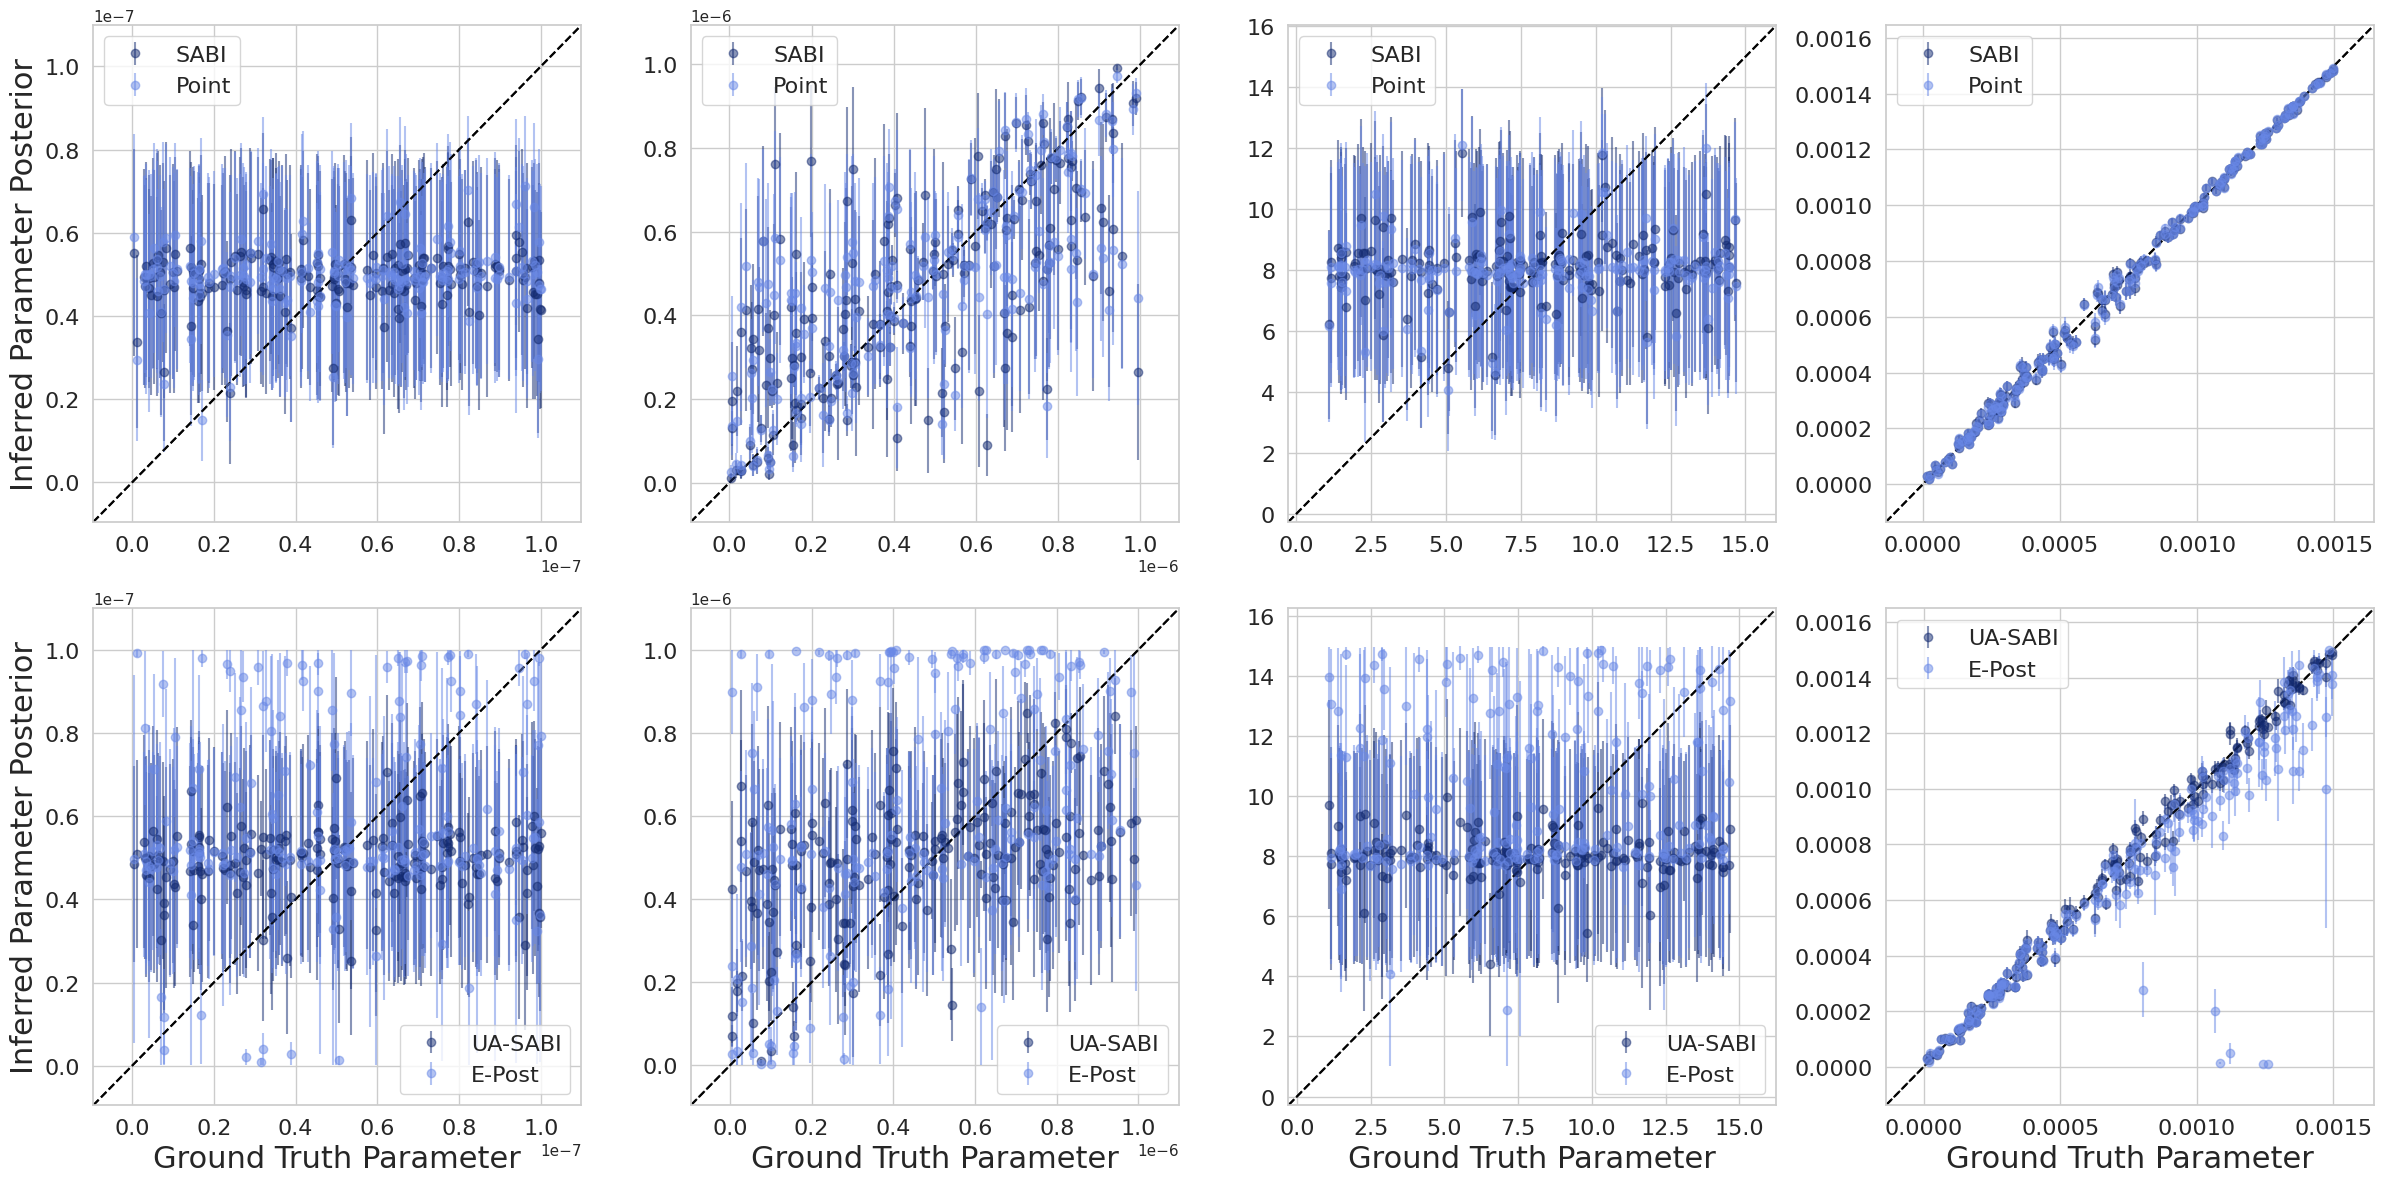

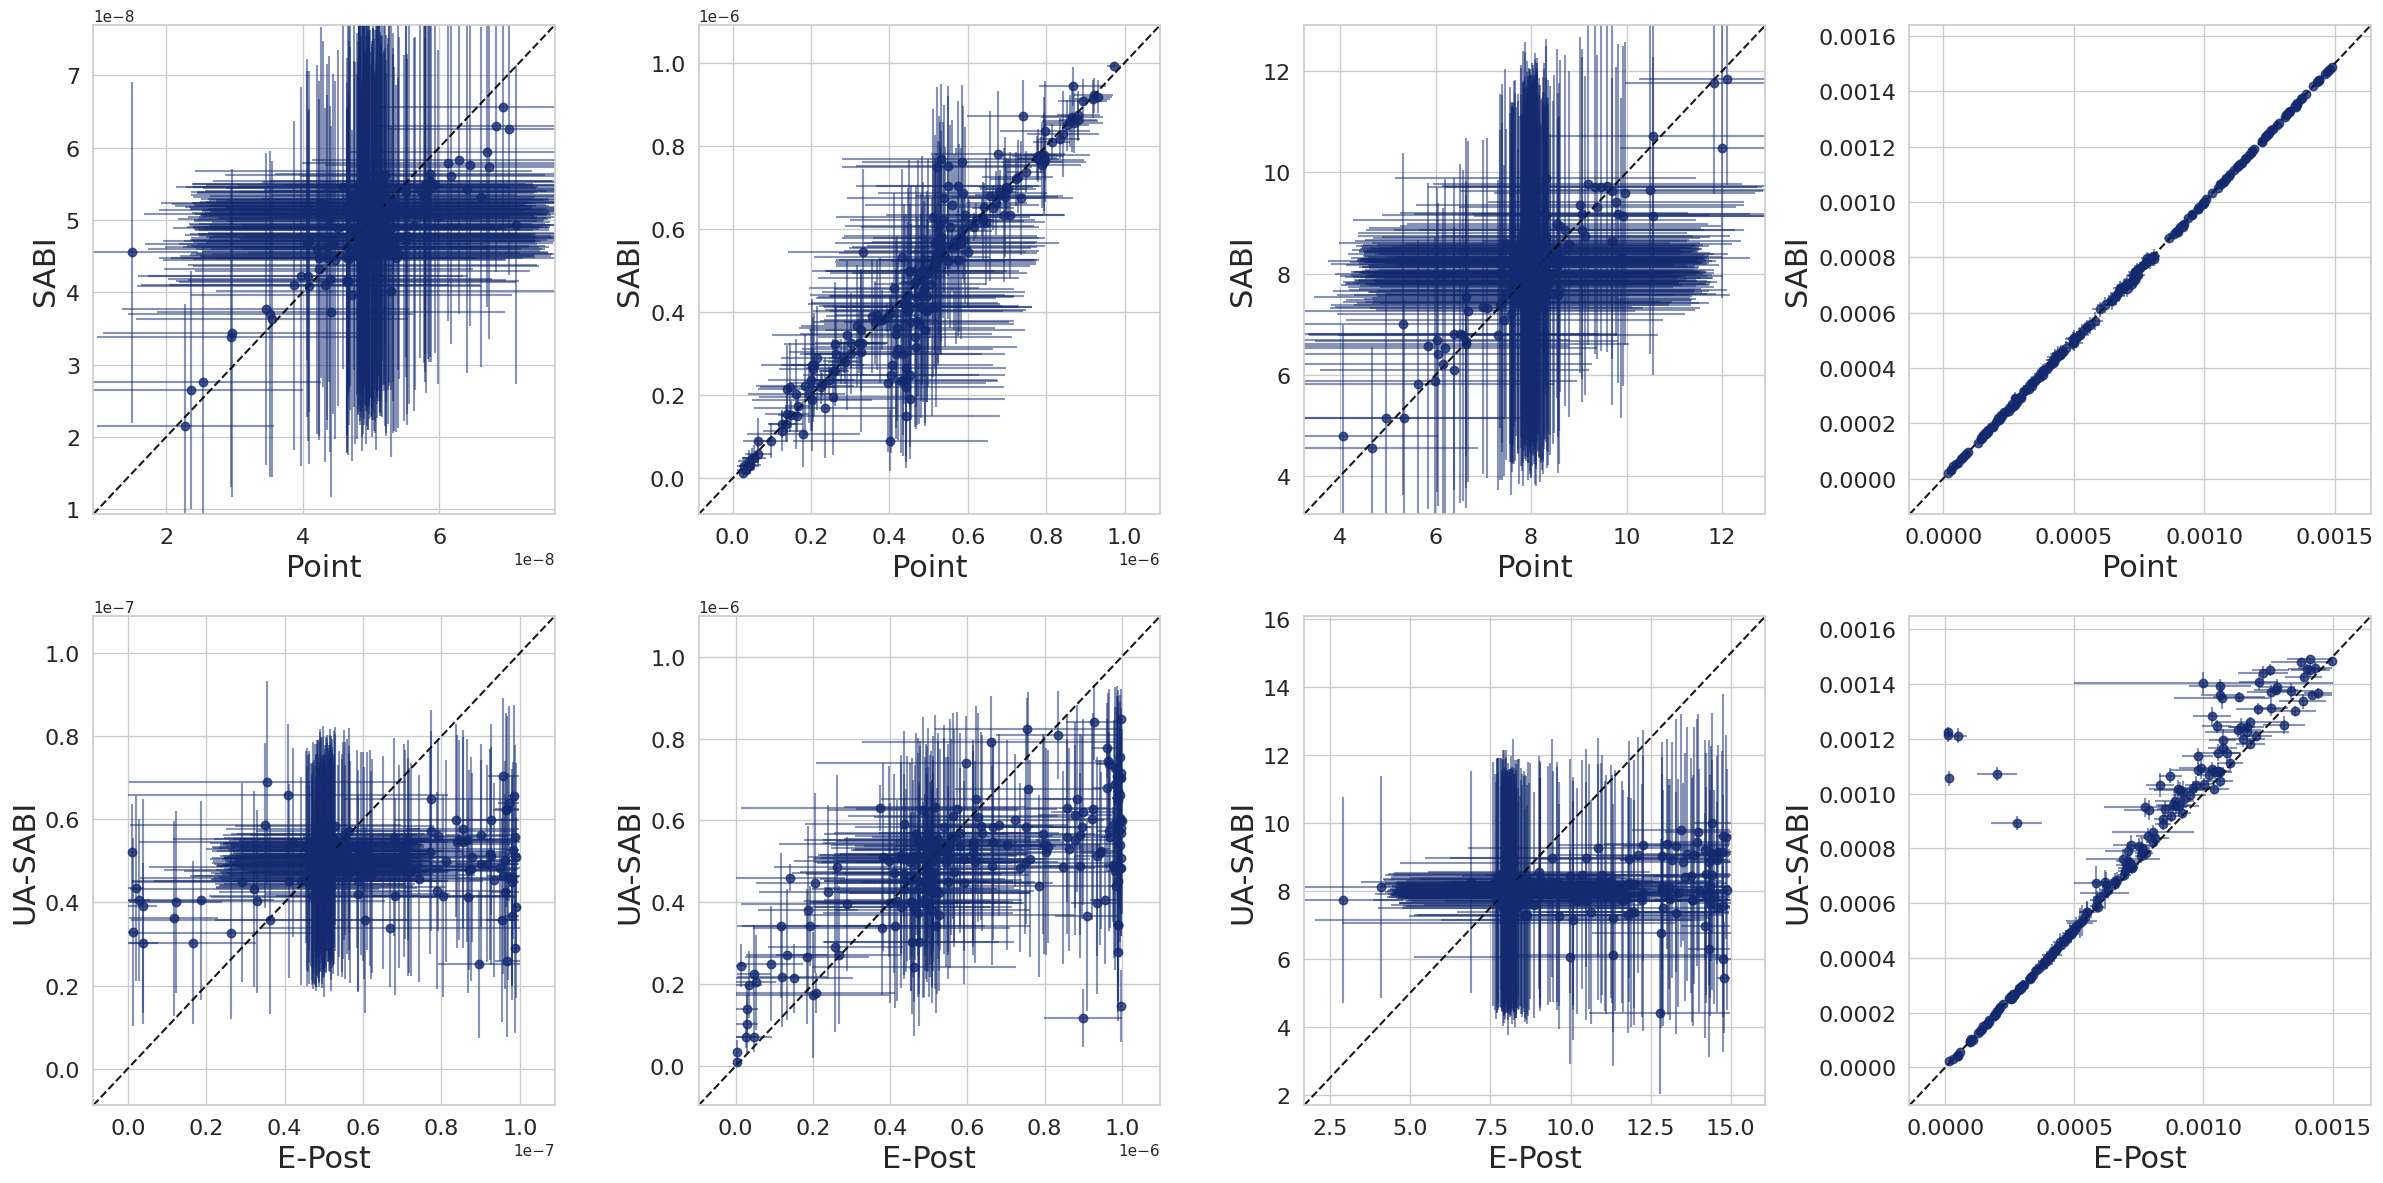

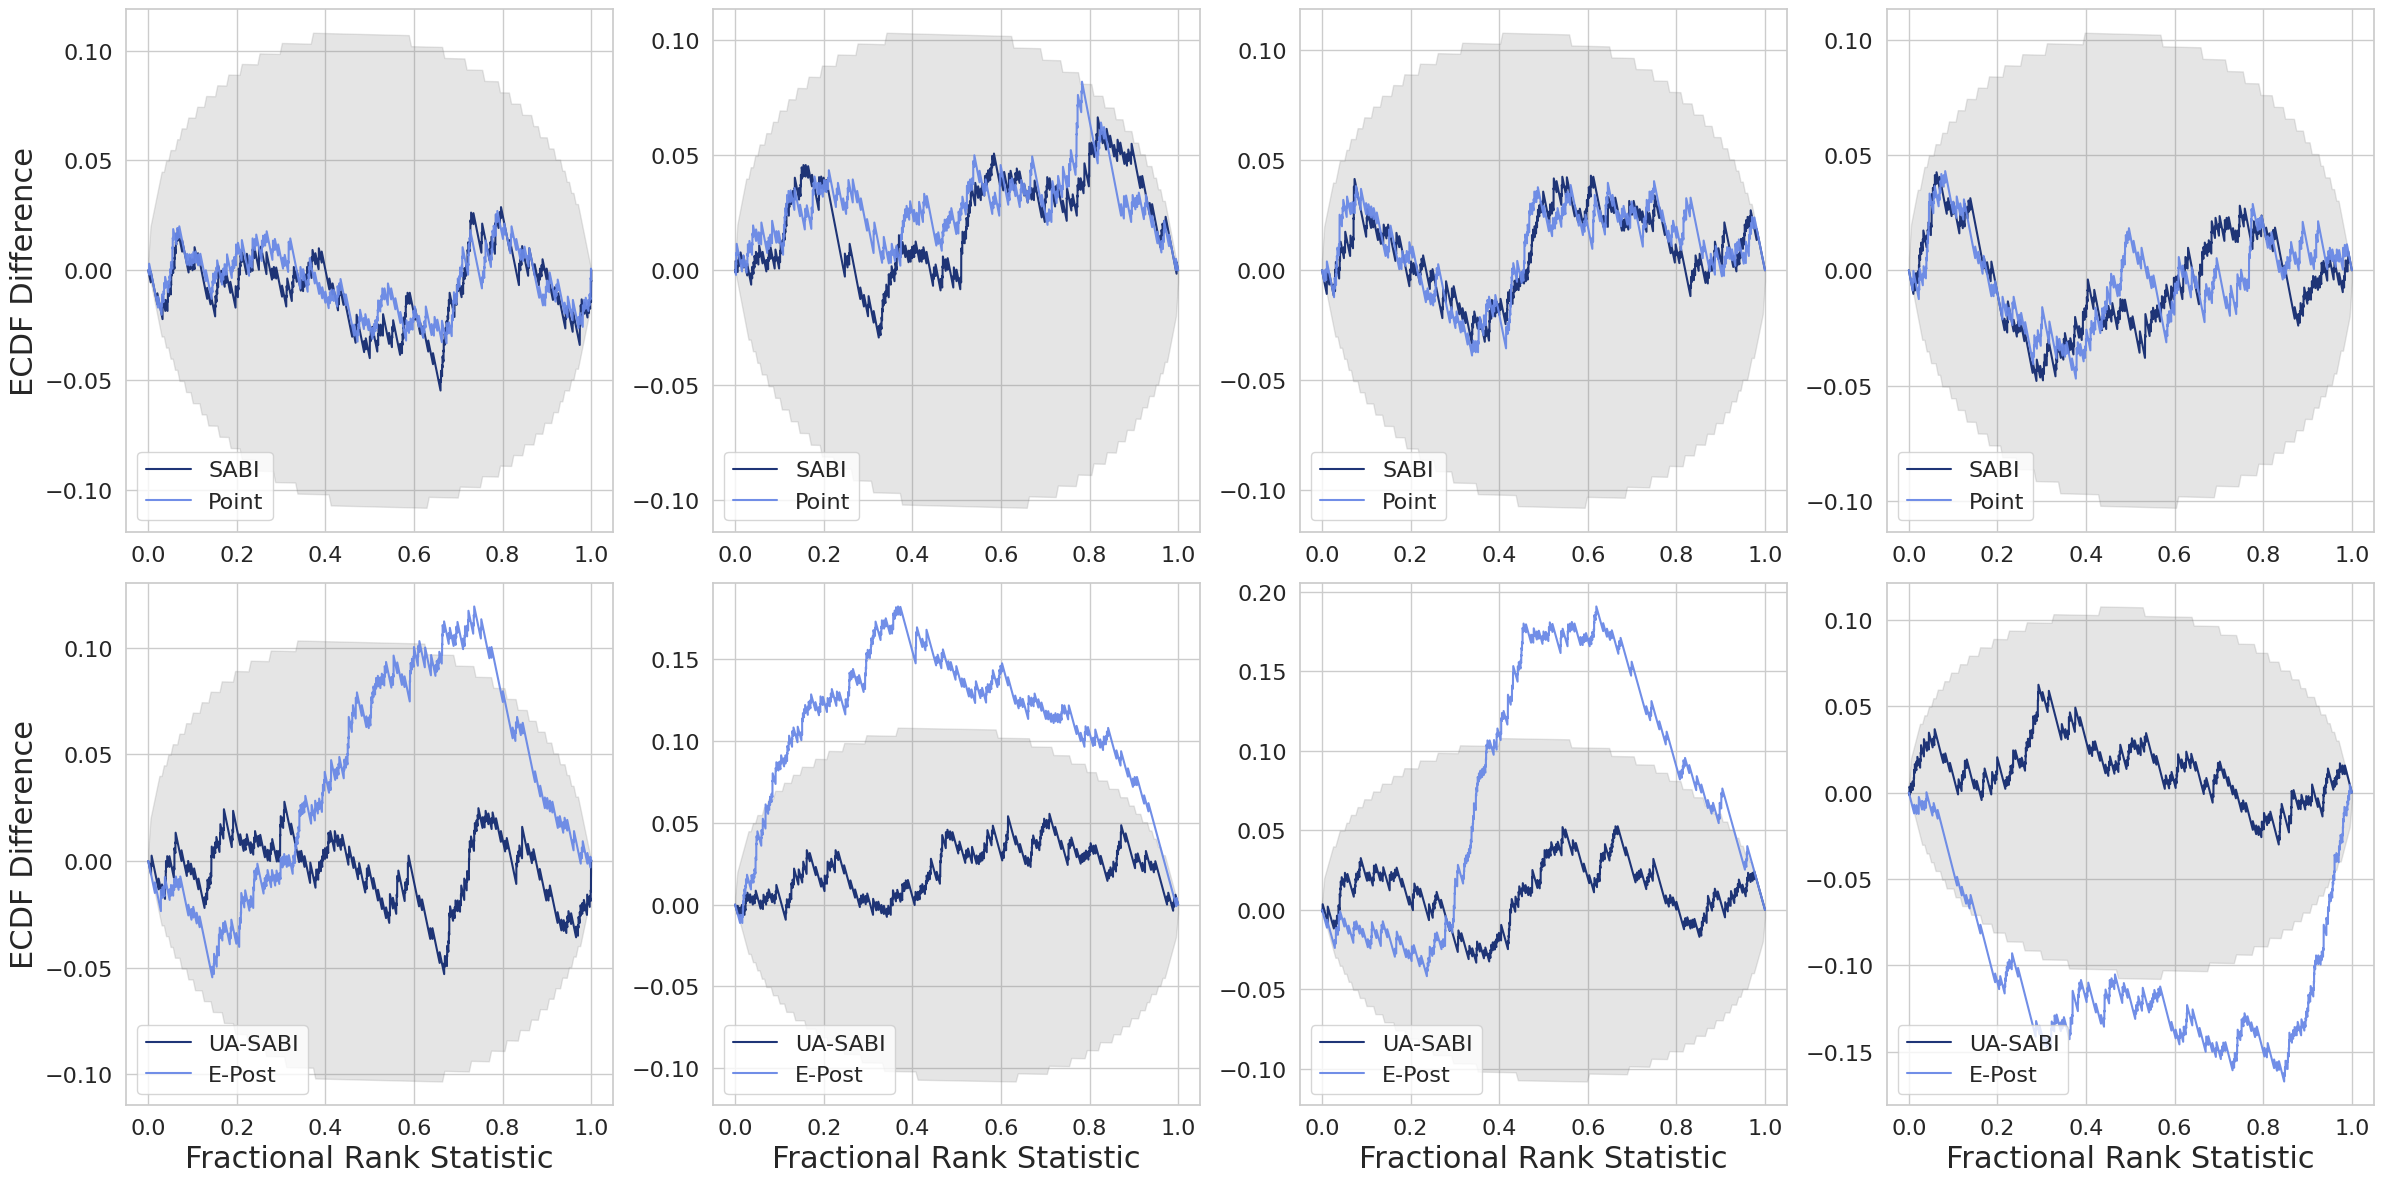

In [12]:

parameter = None
height = 6
data_to_plot, out_params_dict_plot, labels = get_mcmc_abi_comparison_data(parameter, parameter_draws_dict, out_params_dict_)
vis.compare_posterior_multi_parameter_recovery(out_params_dict_plot, data_to_plot, height=height, labels=labels)
vis.compare_posterior_multi_parameter_mcmc_abi(out_params_dict_plot, data_to_plot, height=height, labels=labels)
vis.compare_posterior_multi_parameter_calibration(out_params_dict_plot, data_to_plot, height=height, labels=labels)